# Project: TMBd Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<!-- <li><a href="#conclusions">Conclusions</a></li>     -->
</ul>

<a id='intro'></a>
## Introduction

This is a part of the projects I did in the Udacity Data Analyst Nanodegree Programme.

The data set contains observation of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. You can find more about the dataset [here](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset). In this project, I'm going to investigate the dataset to find out the movies with highest profits, hits and other interesting stuff about movies from the data.

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('tmdb-movies.csv')
# display all columns
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='cleaning'></a>
## Data Cleaning

I'd be accessing, cleaning and exploring the dataset here.

In [3]:
print(df.shape)
df.info()

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The columns below won't be useful in our analysis, so I'll drop them

In [6]:
# drop unwanted columns
df.drop(df[['id', 'imdb_id', 'homepage', 'tagline', 'keywords']], axis=1, inplace=True)

The reasons for dropping each column are as follows:

1. 'id': This column appears to be an identifier for the movies, and it usually doesn't provide meaningful information for analysis since it's likely just a unique identifier for each row in the dataset.

2. 'imdb_id': Similarly, this column seems to be an identifier related to IMDB, which may not be needed for your analysis unless you specifically intend to cross-reference data with IMDB.

3. 'homepage': This column contains URLs to movie homepages. Unless you plan to use these URLs for web scraping or accessing additional data from the homepages, it's not typically relevant to most types of analysis.

4. 'tagline': The tagline is often a brief marketing slogan for the movie. For many types of analysis, it's considered non-essential textual information that doesn't contribute to the core analysis objectives.

5. 'keywords': This column often contains keywords or phrases related to the movie's content or themes. While it may be interesting for some text analysis tasks, it's not commonly used in general movie analysis.

In [7]:
# check for duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1


**Dealing with the missing values**

In [8]:
numbers = np.arange(10)
numbers
list(filter(lambda x: x%2 == 0, numbers))

[0, 2, 4, 6, 8]

In [9]:
# Checking for columns containing Zero value
df.apply(lambda x: (x==0).any())[lambda x: x].index.to_list()

['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']

In [10]:
# replacing the zero values with null values.

df['budget'].replace(0, np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['runtime'].replace(0, np.nan, inplace=True)
df['budget_adj'].replace(0, np.nan, inplace=True)
df['revenue_adj'].replace(0, np.nan, inplace=True)

In [11]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [12]:
missing_val = pd.concat([df.isnull().sum(), (df.isnull().mean() * 100).round(2)], axis=1, keys=['Total', '%'])
missing_val = missing_val[missing_val['Total'] > 0].sort_values(by='Total', ascending=False)
print('Checking for null values in the dataset')
missing_val

Checking for null values in the dataset


,Total,%
revenue,6016,55.37
revenue_adj,6016,55.37
budget,5696,52.43
budget_adj,5696,52.43
production_companies,1030,9.48
cast,76,0.70
director,44,0.40
runtime,31,0.29
genres,23,0.21
overview,4,0.04


We will remove the numerical rows with missing values completely and then impute the non-numerical columns with "Unknown" to signify missing data.

In [13]:
df['cast'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['overview'].fillna('Unknown', inplace=True)
df['genres'].fillna('Unknown', inplace=True)
df['production_companies'].fillna('Unknown', inplace=True)

In [14]:
# drop null values
df.dropna(inplace=True)

In [15]:
# confirm null values are gone
df.isnull().sum().any()

False

**Change the data types of the columns where necessary**

In [16]:
# change runtime to int from float
df['runtime'] = df['runtime'].astype('int')

In [17]:
# release data is an object data type which isn't meant to be. convert to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [18]:
# confirm data types
df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                          int32
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

The following columns contain multiple values separated by pipe (|) characters. Lets's rectify this

In [19]:
columns_with_pipes = []

for col in df.columns:
    if df[col].apply(lambda x: '|' in str(x)).any():
        columns_with_pipes.append(col)

print(columns_with_pipes)

['cast', 'director', 'genres', 'production_companies']


In [20]:
columns_with_pipes = ['cast', 'director', 'genres', 'production_companies']

for col in columns_with_pipes:
    split_data = df[col].str.split('|', expand=True)
    split_data.columns = [f"{col}_{i+1}" for i in range(split_data.shape[1])]

    df = pd.concat([df, split_data], axis=1)
    df.drop(col, axis=1, inplace=True)

In [21]:
# columns of new dataset
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'overview',
       'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'cast_1', 'cast_2', 'cast_3', 'cast_4',
       'cast_5', 'director_1', 'director_2', 'director_3', 'director_4',
       'director_5', 'director_6', 'director_7', 'director_8', 'director_9',
       'director_10', 'director_11', 'director_12', 'genres_1', 'genres_2',
       'genres_3', 'genres_4', 'genres_5', 'production_companies_1',
       'production_companies_2', 'production_companies_3',
       'production_companies_4', 'production_companies_5'],
      dtype='object')

In [22]:
df.head(1)

,popularity,budget,revenue,original_title,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,director_11,director_12,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,None,None,None,None,None,None,None,None,None,None,None,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


**Get index labels of the new columns added to the dataframe**

In [23]:
# cast
cols_to_find_cast = df.loc[:, 'cast_1':'cast_5']
print([df.columns.get_loc(col) for col in cols_to_find_cast])

# director
cols_to_find_dir = df.loc[:, 'director_1':'director_12']
print([df.columns.get_loc(col) for col in cols_to_find_dir])

# genres
cols_to_find_g = df.loc[:, 'genres_1':'genres_5']
print([df.columns.get_loc(col) for col in cols_to_find_g])

# production companies
cols_to_find_pd = df.loc[:, 'production_companies_1':'production_companies_5']
print([df.columns.get_loc(col) for col in cols_to_find_pd])

[12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[29, 30, 31, 32, 33]
[34, 35, 36, 37, 38]


In [24]:
# Concatenating all the separated columns into a single column and dropping the nan values

df['casts'] = df[df.columns[12:17]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df['directors'] = df[df.columns[17:29]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df['genres'] = df[df.columns[29:34]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df['production_companies'] = df[df.columns[34:39]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [25]:
# drop the index labels of the new columns
df.drop(df.iloc[:, 12:39],inplace=True, axis=1)

In [26]:
# checking the new columns
df[['casts', 'directors', 'genres', 'production_companies']]

,casts,directors,genres,production_companies
0,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda..."
1,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ..."
2,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago..."
3,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot"
4,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ..."
...,...,...,...,...
10822,"Elizabeth Taylor,Richard Burton,George Segal,S...",Mike Nichols,Drama,Chenault Productions
10828,"Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶...",Alfred Hitchcock,"Mystery,Thriller",Universal Pictures
10829,"John Wayne,Robert Mitchum,James Caan,Charlene ...",Howard Hawks,"Action,Western","Paramount Pictures,Laurel Productions"
10835,"Steve McQueen,Richard Attenborough,Richard Cre...",Robert Wise,"Action,Adventure,Drama,War,Romance","Twentieth Century Fox Film Corporation,Solar P..."


In [27]:
# copy the data to a new dataframe
df1 = df.copy()

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3854 non-null   float64       
 1   budget                3854 non-null   float64       
 2   revenue               3854 non-null   float64       
 3   original_title        3854 non-null   object        
 4   overview              3854 non-null   object        
 5   runtime               3854 non-null   int32         
 6   release_date          3854 non-null   datetime64[ns]
 7   vote_count            3854 non-null   int64         
 8   vote_average          3854 non-null   float64       
 9   release_year          3854 non-null   int64         
 10  budget_adj            3854 non-null   float64       
 11  revenue_adj           3854 non-null   float64       
 12  casts                 3854 non-null   object        
 13  directors             

<a id='eda'></a>
## Exploratory Data Analysis

In [29]:
# custom colors

my_colors = ["#c6b34e","#95354a", "#57b9a8","#b0ddff", "#426872","#215c97", "#02b6b4","#b05468","#cd9f62","#aaaaaa","#8fce00","#827861"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
from matplotlib.colors import ListedColormap
colors = ['#ffffcd', '#ffeaa4', '#ffca2a','#c6b34e']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

In [32]:
df1.corr(numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.446987,0.615535,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
budget,0.446987,1.000000,0.688556,0.260977,0.556937,0.024169,0.268040,0.958520,0.533498
revenue,0.615535,0.688556,1.000000,0.250298,0.754567,0.227123,0.139140,0.657567,0.900882
runtime,0.215092,0.260977,0.250298,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.780096,0.556937,0.754567,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,0.317866,0.024169,0.227123,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.173278,0.268040,0.139140,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,0.399356,0.958520,0.657567,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,0.546959,0.533498,0.900882,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


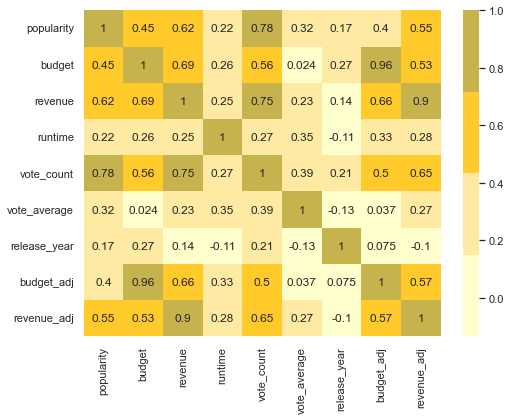

In [33]:
plt.figure(figsize=[8, 6])
sns.heatmap(df1.corr(numeric_only=True), xticklabels=True, annot=True, cmap=cmap)
plt.show();

### What movies had the highest and least revenue?

In [34]:
df.groupby("original_title")['revenue'].sum().sort_values(ascending=False).to_frame()

,revenue
original_title,
Avatar,2.781506e+09
Star Wars: The Force Awakens,2.068178e+09
Titanic,1.845034e+09
The Avengers,1.568081e+09
Jurassic World,1.513529e+09
...,...
Bordello of Blood,5.000000e+00
Kid's Story,5.000000e+00
Dr. Horrible's Sing-Along Blog,3.000000e+00


In [35]:
df1.groupby('genres')['revenue'].sum().sort_values(ascending=False).to_frame()

,revenue
genres,
Comedy,1.834336e+10
Drama,1.427490e+10
"Comedy,Romance",1.080661e+10
"Adventure,Fantasy,Action",7.597484e+09
"Animation,Family",6.572638e+09
...,...
"Western,Thriller",6.147000e+03
"Science Fiction,Adventure,Action,Comedy,Family",7.800000e+01
"Thriller,Romance",6.000000e+00


We can see that comic movies generated the highest revenue while `Science Fiction,Animation` had the lowest revenue

### What movies had the highest and least budget?

In [36]:
df1.groupby('original_title')['budget'].sum().sort_values(ascending=False).to_frame()

,budget
original_title,
The Warrior's Way,425000000.0
Pirates of the Caribbean: On Stranger Tides,380000000.0
Pirates of the Caribbean: At World's End,300000000.0
Godzilla,290000000.0
Avengers: Age of Ultron,280000000.0
...,...
Boy,3.0
Tales from the Darkside: The Movie,3.0
Death Wish 2,2.0


In [37]:
df1.groupby('genres')['budget'].sum().sort_values(ascending=False).to_frame()

,budget
genres,
Comedy,6.160278e+09
Drama,5.224799e+09
"Comedy,Romance",2.983992e+09
"Drama,Romance",2.063387e+09
"Comedy,Drama,Romance",1.958785e+09
...,...
"Drama,Action,Comedy",3.119200e+04
"Action,Drama,Romance",1.700000e+04
"Science Fiction,Fantasy,Horror,Drama",1.000000e+04


We can see that comic movies had the highest budgets while `Science Fiction,Animation` had the least budget

### What is the distribution of movie runtimes in the dataset, and are there any outliers or unusual patterns in runtime values?

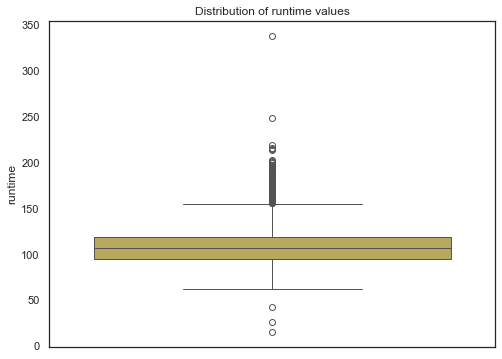

In [38]:
plt.figure(figsize=[8, 6])
sns.boxplot(y=df1['runtime']).set(title='Distribution of runtime values')
plt.show();

### How has the popularity of movies changed over the years? Is there any trend or pattern in movie popularity?

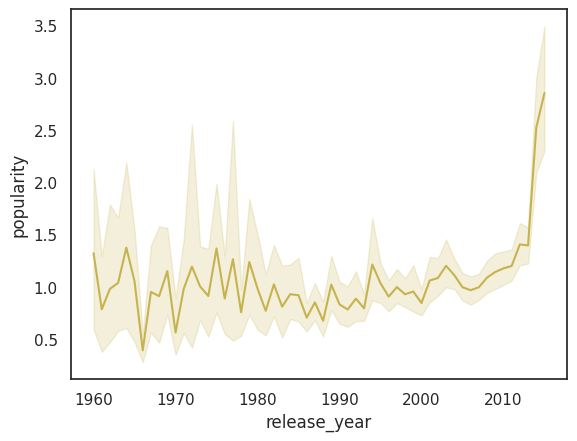

In [74]:
sns.lineplot(data=df1, x='release_year', y='popularity')
plt.show();

### Are there any relationships between a movie’s budget and its revenue? Can we identify any trends or correlations between these two variables?

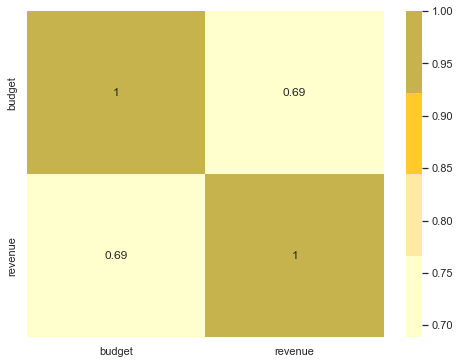

In [47]:
plt.figure(figsize=[8, 6])
correlation = df[['budget', 'revenue']].corr()
sns.heatmap(correlation, cmap=cmap, annot=True);

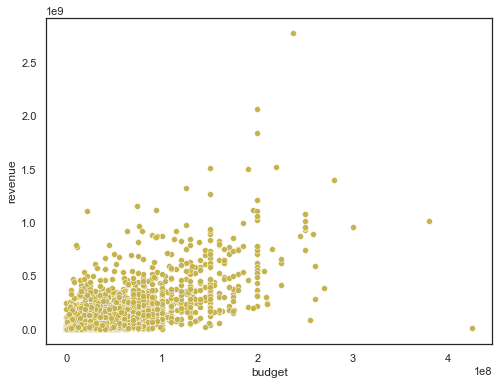

In [49]:
plt.figure(figsize=[8, 6])
sns.scatterplot(data=df, x='budget', y='revenue');

### What is the distribution of movie release years, and are there any interesting trends or patterns over time?

### What are the most common genres in the dataset, and how does the frequency of different genres change over time?

### What is the distribution of movie release years, and are there any interesting trends or patterns over time?

### Are there any notable relationships between the cast and the movie’s popularity or revenue? Can we identify any actors or actresses associated with successful movies?

### How does the movie’s runtime relate to its popularity or revenue? Are longer or shorter movies more popular or profitable?

### What is the distribution of movie ratings (vote_average), and are there any patterns in highly-rated movies over the years?

### Can we identify any production companies that consistently produce high-revenue movies?

### How has the inflation-adjusted budget and revenue of movies changed over time? Are movies getting more or less expensive to produce, and are they generating more revenue when adjusted for inflation?

### Are there any patterns or correlations between different variables? For example, is there a relationship between the runtime and the budget of a movie?

### What are the most common keywords or themes used in movie overviews, and can we identify any trends in the type of content described in movie overviews?

### How does the movie’s runtime relate to its popularity or revenue? Are longer or shorter movies more popular or profitable?Are there any movies with exceptionally high or low budgets, revenues, or ratings? What can we learn from examining these outliers?

### What is the overall trend in the number of movies released each year, and are there any years with a significantly higher or lower number of releases?

### Are there any trends in the cast and director combinations? Are certain actors or directors frequently paired together in movies?

### Movies with the highest and lowest runtime.

In [50]:
df1.groupby('original_title')['runtime'].sum().sort_values(ascending=False).to_frame()

,runtime
original_title,
Carlos,338
King Kong,321
The Great Gatsby,287
Casino Royale,275
The Karate Kid,266
...,...
Winnie the Pooh,63
Louis C.K.: Live at the Beacon Theater,62
Dr. Horrible's Sing-Along Blog,42


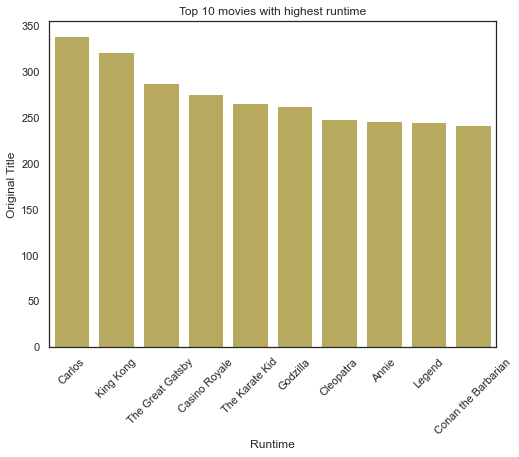

In [61]:
# top 10 movies with the highest runtime
plt.figure(figsize=[8, 6])
x = df1.groupby('original_title')['runtime'].sum().sort_values(ascending=False).head(10)
sns.barplot(x)
plt.ylabel('Original Title')
plt.xlabel('Runtime')
plt.title("Top 10 movies with highest runtime")
plt.xticks(rotation=45);

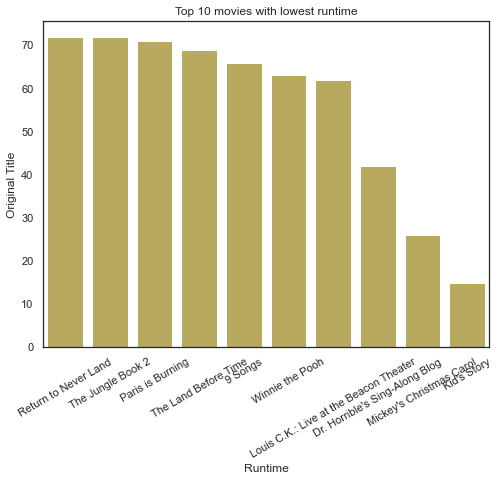

In [64]:
# top 10 movies with the lowest runtime
plt.figure(figsize=[8, 6])
x = df1.groupby('original_title')['runtime'].sum().sort_values(ascending=False).tail(10)
sns.barplot(x)
plt.ylabel('Original Title')
plt.xlabel('Runtime')
plt.title("Top 10 movies with lowest runtime")
plt.xticks(rotation=30);

### Genres with the highest and lowest runtime.

In [65]:
df1.groupby('genres')['runtime'].sum().sort_values(ascending=False).to_frame()

,runtime
genres,
Drama,29231
Comedy,22982
"Drama,Romance",12435
"Comedy,Romance",10684
"Comedy,Drama,Romance",9751
...,...
"Music,Animation,Family,Fantasy",74
"Action,Family",73
"Adventure,Fantasy,Animation,Family",72


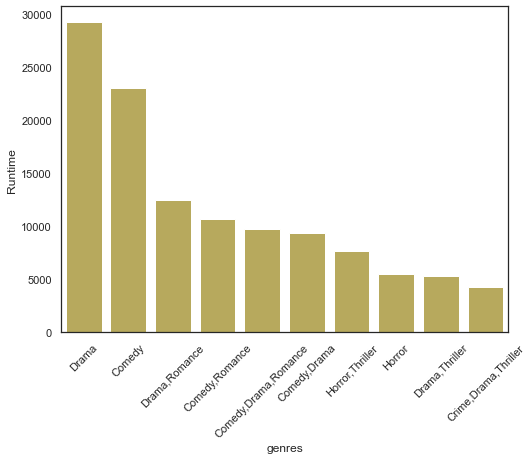

In [69]:
# top 5 movies with the highest runtime
plt.figure(figsize=[8, 6])
x = df1.groupby('genres')['runtime'].sum().sort_values(ascending=False).head(10)
sns.barplot(x)
plt.xlabel('genres')
plt.ylabel('Runtime')
plt.xticks(rotation=45);

### Most profitabale movies

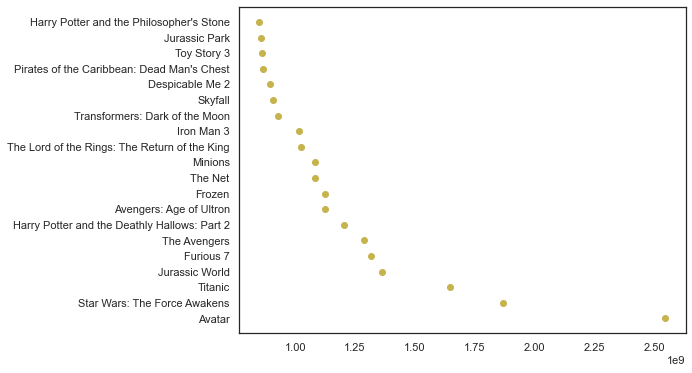

In [81]:
df1['profit'] = df1['revenue'] - df1['budget']
plt.figure(figsize=(8, 6))
x = df1.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(20)
plt.scatter(x.values, x.index);

### Hit movies!(most popular movies)

In [84]:
df1.groupby('original_title')['popularity'].mean().sort_values(ascending=False).to_frame()

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
...,...
The Bad News Bears,0.017498
The In Crowd,0.015997
Spacehunter: Adventures in the Forbidden Zone,0.015727


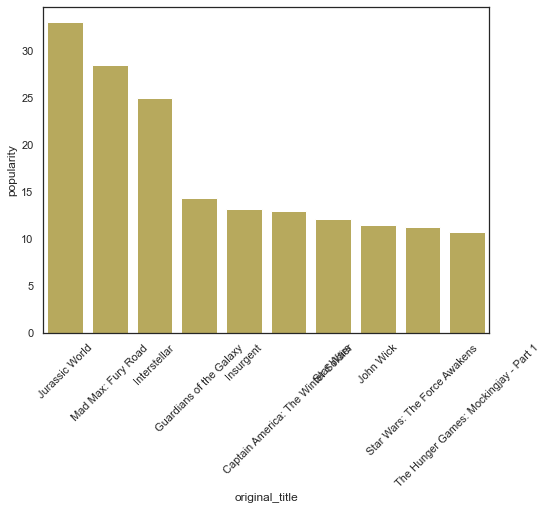

In [86]:
x = df1.groupby('original_title')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x)
plt.xticks(rotation=45)
plt.show();

In [87]:
print('The most popular movie is "{}"'.format(df1.groupby('original_title')['popularity'].mean().sort_values(ascending=False).idxmax()))
print('The least popular movie is "{}"'.format(df1.groupby('original_title')['popularity'].mean().sort_values(ascending=False).idxmin()))

The most popular movie is "Jurassic World"
The least popular movie is "Born into Brothels"


### Number of movie genres released over the years

In [88]:
# number of genres released over the years
df1.groupby('release_year')['genres'].count()

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     57
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    127
2003    121
2004    147
2005    163
2006    169
2007    165
2008    167
2009    174
2010    178
2011    199
2012    158
2013    180
2014    165
2015    160
Name: genres, dtype: int64

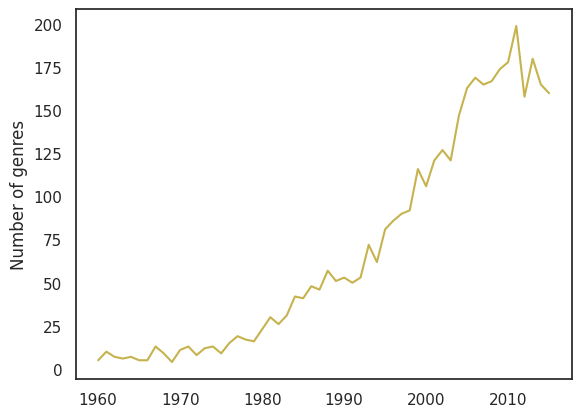

In [115]:
x = df1.groupby('release_year')['genres'].count()
plt.plot(x.index, x.values)
plt.ylabel('Number of genres')
plt.show();

### Most popular genres

In [98]:
df.groupby('genres')['popularity'].mean().sort_values(ascending=False).to_frame()

,popularity
genres,
"Adventure,Drama,Science Fiction",24.949134
"Adventure,Science Fiction,Thriller",13.112507
"Action,Adventure,Science Fiction,Fantasy",11.173104
"Action,Adventure,Science Fiction,Thriller",10.968489
"Science Fiction,Adventure,Thriller",10.739009
...,...
"Drama,Action,Comedy",0.092519
"Drama,Comedy,Romance,Foreign",0.087942
"Action,Comedy,Thriller,Crime,Mystery",0.078482


Action movies

In [99]:
df_group = df1.groupby('genres')
df_group.get_group('Action')['release_year']

25       2015
1456     2009
1471     2009
1938     2010
1975     2010
2772     2001
2932     2008
3924     2002
4484     2012
4988     2003
5130     2003
5135     2003
6229     2005
6260     2005
6313     2005
6681     2006
6763     2006
7142     2004
7586     2007
9455     1988
10364    1993
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Action movie releases over time')

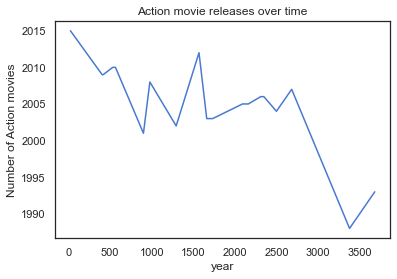

In [ ]:
x = df_group.get_group('Action')['release_year']
sns.lineplot(x.index, x.values)
plt.xlabel('year')
plt.ylabel('Number of Action movies')
plt.title('Action movie releases over time')

In [103]:
func_dict = {'revenue_adj': 'mean'}
df1.groupby('genres').aggregate(func_dict)

,revenue_adj
genres,
Action,1.157285e+08
"Action,Adventure",1.391337e+08
"Action,Adventure,Animation,Family,Fantasy",5.380038e+08
"Action,Adventure,Animation,Family,Science Fiction",7.289654e+08
"Action,Adventure,Animation,Science Fiction",5.298017e+06
...,...
"Western,Drama",1.766125e+06
"Western,Drama,Adventure,Thriller",4.903142e+08
"Western,History",4.179465e+07


In [104]:
x = df1.groupby('genres').aggregate(func_dict)
x['revenue_adj'].sort_values(ascending=False)

genres
Horror,Thriller,Adventure                         1.907006e+09
Action,Adventure,Science Fiction,Fantasy          1.902723e+09
Science Fiction,Adventure,Family,Fantasy          1.791694e+09
Crime,Drama,Mystery,Thriller,Action               1.583050e+09
Family,Animation,Drama                            1.159592e+09
                                                      ...     
Western,Thriller                                  5.753797e+03
Science Fiction,Adventure,Action,Comedy,Family    1.248852e+02
Thriller,Romance                                  8.585801e+00
Science Fiction,Animation                         5.926763e+00
Adventure,Action,Comedy,Science Fiction,Music     3.038360e+00
Name: revenue_adj, Length: 1053, dtype: float64

### Month with highest number of movie releases

In [106]:
df1['month'] = df1['release_date'].dt.month_name()

In [107]:
df1.groupby('month')['genres'].size().sort_values(ascending=False)

month
September    460
December     415
October      363
June         340
August       337
July         316
November     304
May          291
March        279
April        267
February     257
January      225
Name: genres, dtype: int64

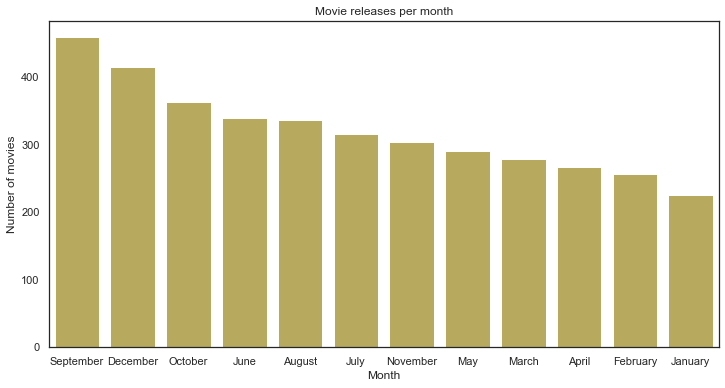

In [116]:
plt.figure(figsize=(12, 6))
x = df1.groupby('month')['genres'].size().sort_values(ascending=False)
sns.barplot(x).set(title='Movie releases per month', xlabel='Month', ylabel='Number of movies');

### Day with highest number of movie release

In [111]:
df1['day'] = df1['release_date'].dt.day_name()
df1.groupby('day')['genres'].size().sort_values(ascending=False)

day
Friday       1665
Thursday      760
Wednesday     656
Tuesday       293
Monday        180
Saturday      160
Sunday        140
Name: genres, dtype: int64

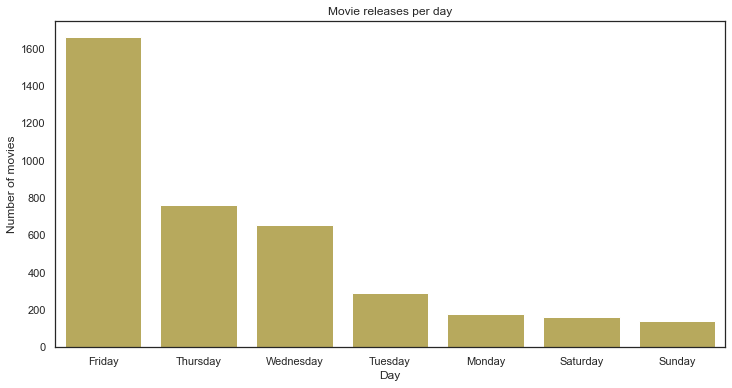

In [117]:
plt.figure(figsize=(12, 6))
x = df1.groupby('day')['genres'].size().sort_values(ascending=False)
sns.barplot(x).set(title='Movie releases per day', xlabel='Day', ylabel='Number of movies');